# <b> Machine Learning Model to Predict the Overall Rating of Beers

### <b> Imports 

In [1]:
# Data manipulation, math and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Machine learning
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn import preprocessing

# String conversion
import ast

# Custom colors
pastel = ['PowderBlue', 'PaleTurquoise', 'Lavender', 'SkyBlue', 'LightSteelBlue' ]

### <b> Loading Data

In [2]:
data = pd.read_csv('data/beers.csv')

### <b> Informations About the Data

In [3]:
# First lines
data.head(2)

,review_id,beer_id,brewer_id,beer_name,beer_style,beer_abv,review_appearance,review_aroma,review_palate,review_taste,review_rating,review_text,review_user
0,44610,429,1,Pilsner Urquell,Czech Pilsener,4.4,3.0,3.0,3.0,3.0,2.5,First thing I noticed after pouring from green...,5803
1,37062,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.4,4.0,3.0,3.5,2.5,3.0,A: pours an amber with a one finger head but o...,535


In [4]:
# Last lines
data.tail(2)

,review_id,beer_id,brewer_id,beer_name,beer_style,beer_abv,review_appearance,review_aroma,review_palate,review_taste,review_rating,review_text,review_user
25188,33233,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,11.2,4.0,4.0,5.0,5.0,4.0,Pours a black body with a brown head that very...,2659
25189,23758,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,8.5,4.0,4.0,4.5,4.0,4.0,"A nice sweet, malty beer...nothing complex, ju...",1494


In [5]:
# Rows and cols
data.shape

(25190, 13)

In [6]:
# Data informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25190 entries, 0 to 25189
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          25190 non-null  int64  
 1   beer_id            25190 non-null  int64  
 2   brewer_id          25190 non-null  int64  
 3   beer_name          25190 non-null  object 
 4   beer_style         25190 non-null  object 
 5   beer_abv           25190 non-null  float64
 6   review_appearance  23681 non-null  float64
 7   review_aroma       23428 non-null  float64
 8   review_palate      23175 non-null  float64
 9   review_taste       22758 non-null  float64
 10  review_rating      21663 non-null  float64
 11  review_text        25190 non-null  object 
 12  review_user        25190 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 2.5+ MB


In [7]:
# Statistics
data.describe()

,review_id,beer_id,brewer_id,beer_abv,review_appearance,review_aroma,review_palate,review_taste,review_rating,review_user
count,25190.000000,25190.000000,25190.000000,25190.000000,23681.000000,23428.000000,23175.00000,22758.000000,21663.000000,25190.000000
mean,27340.498849,18134.547360,1995.176776,10.555919,4.008234,4.017479,3.98658,4.106358,4.004085,3670.062763
std,13085.001371,15638.693441,3583.659613,39.228689,0.546348,0.627723,0.61137,0.642246,0.642363,2140.454868
min,60.000000,429.000000,1.000000,3.500000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000
25%,18686.250000,5411.000000,395.000000,6.100000,4.000000,3.500000,3.50000,4.000000,3.500000,1825.000000
50%,27285.500000,16074.000000,1199.000000,8.100000,4.000000,4.000000,4.00000,4.000000,4.000000,3587.500000
75%,37327.750000,25852.000000,1199.000000,9.800000,4.500000,4.500000,4.50000,4.500000,4.500000,5551.000000
max,49999.000000,60511.000000,14879.000000,579.000000,5.000000,5.000000,5.00000,5.000000,5.000000,7438.000000


In [8]:
# Data types
data.dtypes

review_id              int64
beer_id                int64
brewer_id              int64
beer_name             object
beer_style            object
beer_abv             float64
review_appearance    float64
review_aroma         float64
review_palate        float64
review_taste         float64
review_rating        float64
review_text           object
review_user            int64
dtype: object

# <b> Exploratory Data Analysis

## <b> Handling Missing Values

<AxesSubplot:>

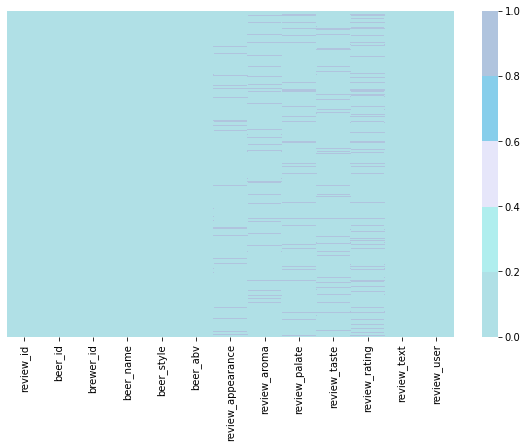

In [9]:
# Looking through a heat map
plt.figure(figsize = (10,6))
sea.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap=pastel)

<b> The thin different lines represents missing values

In [10]:
# Sum of total missing values by column
data.isnull().sum()

review_id               0
beer_id                 0
brewer_id               0
beer_name               0
beer_style              0
beer_abv                0
review_appearance    1509
review_aroma         1762
review_palate        2015
review_taste         2432
review_rating        3527
review_text             0
review_user             0
dtype: int64

In [11]:
# Making a copy of columns with missing data
copy = data[['review_appearance', 
             'review_aroma', 
             'review_palate',
             'review_taste',
             'review_rating']]

In [12]:
# Organizing in a dataframe
data_missing = pd.DataFrame(copy)
data_missing.head()

,review_appearance,review_aroma,review_palate,review_taste,review_rating
0,3.0,3.0,3.0,3.0,2.5
1,4.0,3.0,3.5,2.5,3.0
2,4.0,4.0,4.0,NaN,4.0
3,4.5,4.5,4.5,4.5,4.5
4,4.5,4.0,4.0,4.0,4.0


In [13]:
# Fill the missing values with the median values
imputer_most_freq = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_most_freq.fit(data_missing)
data_imputed = imputer_most_freq.transform(data_missing)

In [14]:
# organizing in a dataframe
new = pd.DataFrame(data_imputed, columns = ['review_appearance',
                                            'review_aroma',
                                            'review_palate',
                                            'review_taste',
                                            'review_rating'])
# Data with filled missing values
new.head()

,review_appearance,review_aroma,review_palate,review_taste,review_rating
0,3.0,3.0,3.0,3.0,2.5
1,4.0,3.0,3.5,2.5,3.0
2,4.0,4.0,4.0,4.0,4.0
3,4.5,4.5,4.5,4.5,4.5
4,4.5,4.0,4.0,4.0,4.0


In [15]:
# Check the result
new.isnull().sum()

review_appearance    0
review_aroma         0
review_palate        0
review_taste         0
review_rating        0
dtype: int64

In [16]:
# Update the original dataset
data['review_appearance'] = new['review_appearance']
data['review_aroma'] = new['review_aroma']
data['review_palate'] = new['review_palate']
data['review_taste'] = new['review_taste']
data['review_rating'] = new['review_rating']

In [17]:
# Checks if everything is ok
data.isnull().sum()

review_id            0
beer_id              0
brewer_id            0
beer_name            0
beer_style           0
beer_abv             0
review_appearance    0
review_aroma         0
review_palate        0
review_taste         0
review_rating        0
review_text          0
review_user          0
dtype: int64

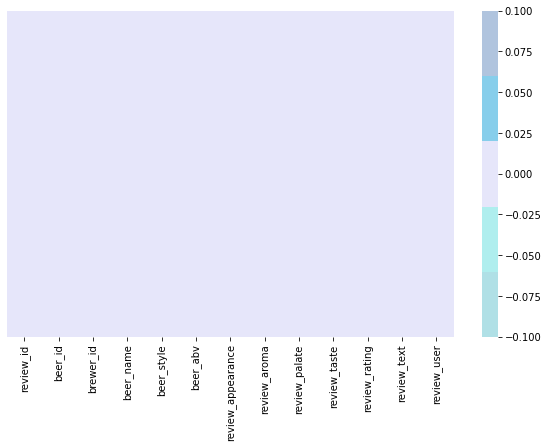

In [21]:
# Looking the result through a heat map
plt.figure(figsize = (10,6))
ax = sea.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap=pastel)

<b> Solid color indicates no missing values

## <b> Handling Outliers

In [22]:
print("Look at the means of the number data = \n",
      data['beer_abv'].mean(), "\n", 
      data['review_appearance'].mean(), "\n",
      data['review_aroma'].mean(), "\n",
      data['review_palate'].mean(), "\n", 
      data['review_taste'].mean(),"\n",
      data['review_rating'].mean())

Look at the means of the number data = 
 10.555919015482335 
 4.007741167129813 
 4.016256450972608 
 3.987653830885272 
 4.09608971814212 
 4.003513298928146


In [23]:
print("Look at the max of the number data = \n",
      data['beer_abv'].max(), "\n", 
      data['review_appearance'].max(), "\n",
      data['review_aroma'].max(), "\n",
      data['review_palate'].max(), "\n", 
      data['review_taste'].max(),"\n",
      data['review_rating'].max())

Look at the max of the number data = 
 579.0 
 5.0 
 5.0 
 5.0 
 5.0 
 5.0


In [24]:
print("Look at the min of the number data = \n",
      data['beer_abv'].min(), "\n", 
      data['review_appearance'].min(), "\n",
      data['review_aroma'].min(), "\n",
      data['review_palate'].min(), "\n", 
      data['review_taste'].min(),"\n",
      data['review_rating'].min())

Look at the min of the number data = 
 3.5 
 1.0 
 1.0 
 1.0 
 1.0 
 1.0


<b> The value 579 for the ABV columns is an outlier

In [25]:
# Select the indexes where the value 579 appears
outliers = data[data['beer_abv'] ==  579.0].index

In [26]:
# Drop them from the dataset
data.drop(outliers, inplace=True, axis=0)

## <b> Splitting Data in Number and Text

In [27]:
# Creating a new dataframe with text columns
text_columns = pd.DataFrame(data = data[['beer_name',
                                            'beer_style',
                                            'review_text']])

In [28]:
# Data types
text_columns.dtypes

beer_name      object
beer_style     object
review_text    object
dtype: object

In [29]:
# Looking at the first columns
text_columns.head()

,beer_name,beer_style,review_text
0,Pilsner Urquell,Czech Pilsener,First thing I noticed after pouring from green...
1,Black Sheep Ale (Special),English Pale Ale,A: pours an amber with a one finger head but o...
2,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,One of the better pumpkin ales I've tried so f...
3,Founders Dirty Bastard,Scotch Ale / Wee Heavy,Poured from 12 oz. bottle into a Sam Adams per...
4,Founders Imperial Stout,Russian Imperial Stout,Bottle poured into a tulip.\t\tA - Pours jet b...


In [30]:
name_style_text = text_columns.copy()

In [31]:
# Function to transform non-numerical labels to numerical labels.
def StringToNumber(values):
    le = preprocessing.LabelEncoder()
    le.fit(values)
    return le.transform(values) 

In [32]:
# Applying the StringToNumber function to strings columns
name_style_text['beer_name'] = StringToNumber(name_style_text['beer_name'])
name_style_text['beer_style'] = StringToNumber(name_style_text['beer_style'])
name_style_text['review_text'] = StringToNumber(name_style_text['review_text'])

In [33]:
# String columns with a numerical representation
name_style_text.head()

,beer_name,beer_style,review_text
0,47,9,9719
1,9,12,6051
2,36,23,14139
3,25,27,15093
4,28,25,8173


In [34]:
# Drop text values
data = data.drop(name_style_text, axis = 1)

<b> Numerical dataset

In [35]:
data.dtypes

review_id              int64
beer_id                int64
brewer_id              int64
beer_abv             float64
review_appearance    float64
review_aroma         float64
review_palate        float64
review_taste         float64
review_rating        float64
review_user            int64
dtype: object

<b> Textual dataset

In [36]:
# String Data #
text_columns.dtypes 

beer_name      object
beer_style     object
review_text    object
dtype: object

<b> Numerical representation of textual dataset

In [37]:
# Numerical Representation of String Data #
name_style_text.dtypes

beer_name      int64
beer_style     int64
review_text    int64
dtype: object

In [38]:
# All numerical data together  
data = pd.concat([data,name_style_text], axis=1)

## <b> Visualization

#### <b> Ratings Distribution

In [39]:
# Counting of ratings 
data['review_rating'].value_counts()

4.0    11783
4.5     5770
3.5     3281
5.0     1936
3.0     1380
2.5      497
2.0      281
1.5       78
1.0       65
Name: review_rating, dtype: int64

Text(0, 0.5, 'Quantity')

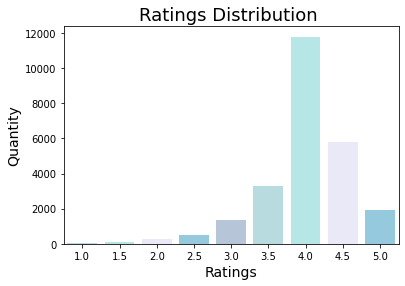

In [40]:
# Visualize counting of ratings 
sea.countplot(data['review_rating'], palette=pastel)
plt.title('Ratings Distribution ', fontsize=18)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Quantity', fontsize=14)

We can see that there's over 1200 beers rated as 4 (the greater amount) and a few rated as less than 2.

##### <b> Total Number of Beers (unique)
    

In [41]:
print("Number of Beers = ", len(data['beer_id'].unique()))

Number of Beers =  63


##### <b> Total Number of Users (unique)
    

In [42]:
print("Number of Users = ", len(data['review_user'].unique()))

Number of Users =  6451


##### <b> Total Number of Brewers (unique)
    

In [43]:
print("Number of Brewers = ", len(data['brewer_id'].unique()))

Number of Brewers =  14


### <b> Number of Rated Beers by Style

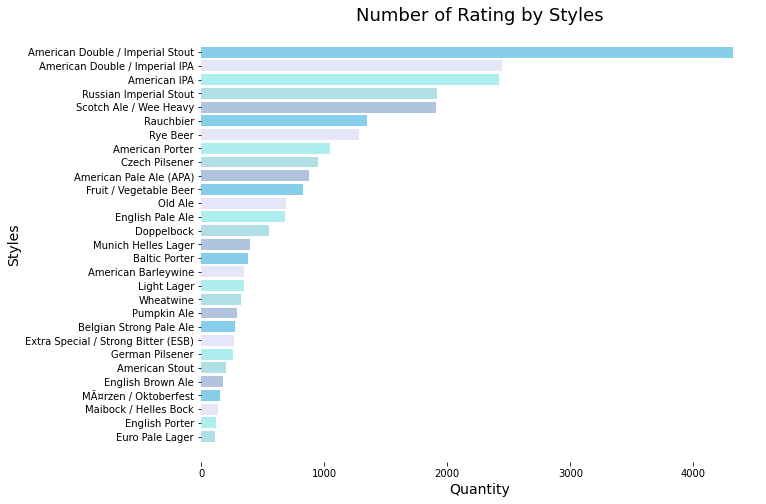

In [44]:
# Grouping the dataset's textual beer_style values
styles = text_columns['beer_style'].value_counts().sort_values(ascending=True)

# Plot the result
plt.figure(figsize = (10,8))
plt.barh(y = styles.index, width = styles.values, color = pastel)
plt.title('Number of Rating by Styles', fontsize=18)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Styles', fontsize=14)
sea.despine(top=True, right=True, left=True, bottom=True)

American Double / Imperial Stout is the more rated style.

### <b> Number of Rated Beers by Names

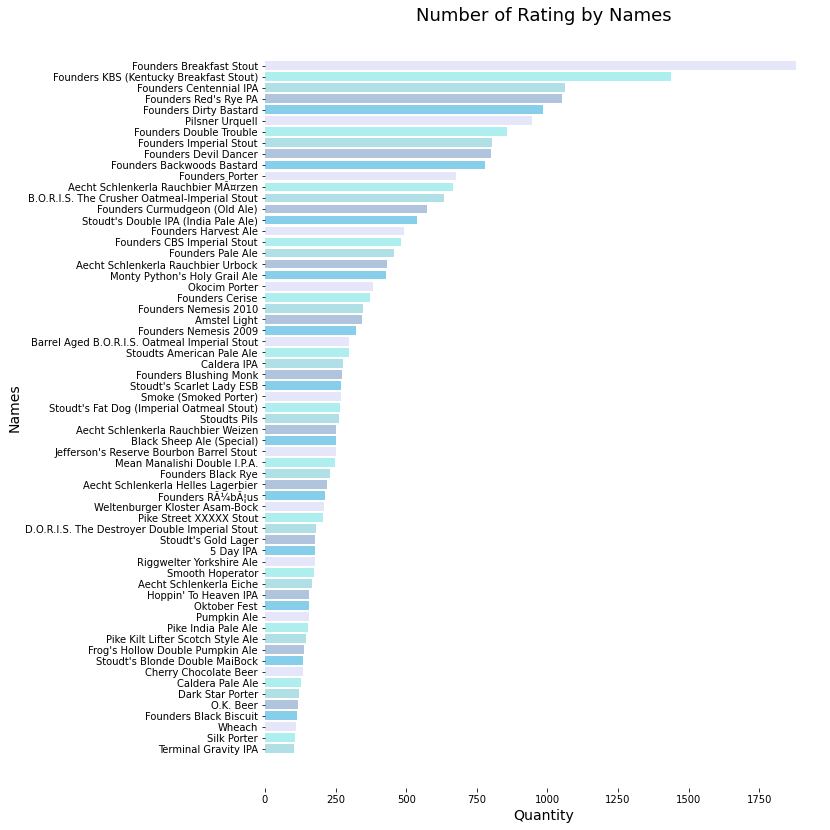

In [45]:
# Grouping the dataset's beer_name textual values
beers = text_columns['beer_name'].value_counts().sort_values(ascending=True)

# Plot the result
plt.figure(figsize = (10,14))
plt.barh(y = beers.index, width = beers.values, color = pastel)
plt.title('Number of Rating by Names', fontsize=18)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Names', fontsize=14)
sea.despine(top=True, right=True, left=True, bottom=True)

The beer named Founders Breakfast Stout is the name of the most rated beer, around 1750 ratings given by users

### <b> Number of Rated Beers by Brewers
    

In [46]:
# Counting the beers by brewers
beer_count = data.groupby(['brewer_id'])['beer_id'].count()

# Organizing in a dataset to a clean visualization 
df_beer_count = pd.DataFrame()
df_beer_count['Brewers'] = beer_count.index
df_beer_count['Beers'] = beer_count.values
df_beer_count.head()

,Brewers,Beers
0,1,946
1,163,345
2,263,1737
3,365,506
4,394,2277


Text(0, 0.5, 'Quantity')

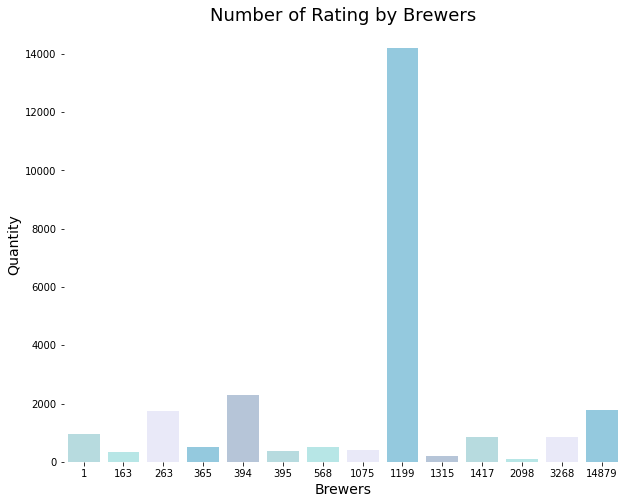

In [47]:
# Plot the results
plt.figure(figsize = (10,8))
sea.barplot(x = 'Brewers', y = 'Beers', data= df_beer_count, palette = pastel)
sea.despine(top=True, right=True, left=True, bottom=True)
plt.title('Number of Rating by Brewers', fontsize=18)
plt.xlabel('Brewers', fontsize=14)
plt.ylabel('Quantity', fontsize=14)

The brewer id 1199 is the brewer with most rated beers.

### <b> Mean Rating of Beers by Styles

In [48]:
# Creating a dataframe with two columns: ratings (numeric) and styles (text)
df_rating_style = pd.DataFrame(columns =['Ratings', 'Styles'])
df_rating_style['Ratings'] = data['review_rating']
df_rating_style['Styles'] = text_columns['beer_style']
df_rating_style.head()

,Ratings,Styles
0,2.5,Czech Pilsener
1,3.0,English Pale Ale
2,4.0,Pumpkin Ale
3,4.5,Scotch Ale / Wee Heavy
4,4.0,Russian Imperial Stout


In [49]:
# Grouping the means of ratings by styles
rating_style = df_rating_style.groupby(['Styles'])['Ratings'].mean().sort_values(ascending=True)

In [50]:
# Creating a new dataframe with the style and repective mean of ratings
df_rating_style_mean = pd.DataFrame()
df_rating_style_mean['Styles'] = rating_style.index
df_rating_style_mean['Ratings Mean'] = rating_style.values
df_rating_style_mean.head()

,Styles,Ratings Mean
0,Light Lager,2.921739
1,Fruit / Vegetable Beer,3.660241
2,English Pale Ale,3.719530
3,Euro Pale Lager,3.747863
4,English Porter,3.747899


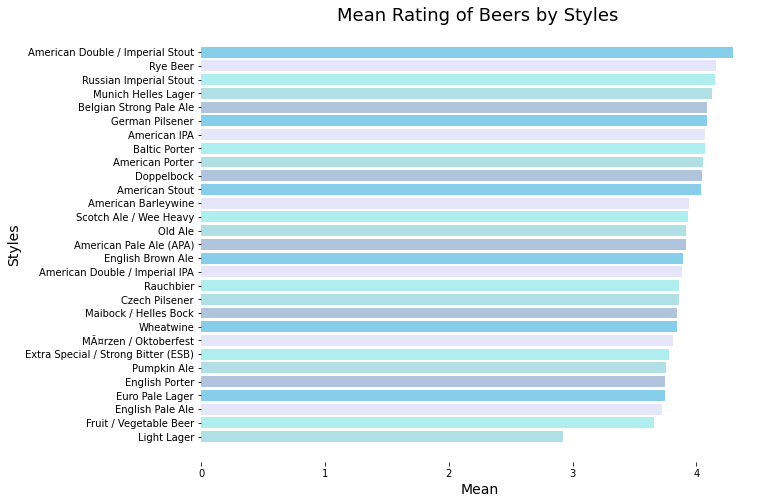

In [51]:
# Plot the results
plt.figure(figsize = (10,8))
plt.barh(y = df_rating_style_mean['Styles'], 
          width = df_rating_style_mean['Ratings Mean'], 
          data = df_rating_style_mean,
          color = pastel)
plt.title('Mean Rating of Beers by Styles ', fontsize=18)
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Styles', fontsize=14)
sea.despine(top=True, right=True, left=True, bottom=True)

### <b> Mean Rating of Beers by ABV

In [52]:
# Creating a dataframe with two columns: ABV and ratings
df_abv_style = pd.DataFrame(columns =['ABV', 'Ratings'])
df_abv_style['ABV'] = data['beer_abv']
df_abv_style['Ratings'] = data['review_rating']

In [53]:
# Grouping the means of ratings by abv
abv_style = df_abv_style.groupby(['ABV'])['Ratings'].mean().sort_values(ascending=True)

In [54]:
# Creating a new dataframe with the style and repective mean of ratings
df_abv_style = pd.DataFrame()
df_abv_style['ABV'] = abv_style.index
df_abv_style['Ratings'] = abv_style.values
df_abv_style.head()

,ABV,Ratings
0,3.5,2.921739
1,5.7,3.556270
2,4.7,3.617716
3,8.2,3.633065
4,5.1,3.711712


Text(0, 0.5, 'Ratings')

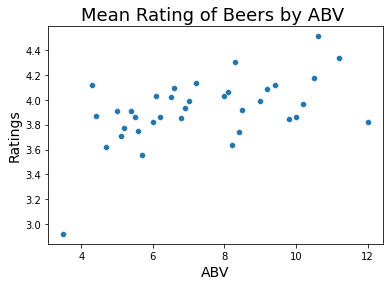

In [55]:
sea.scatterplot(x = 'ABV', y = 'Ratings', data = df_abv_style)
plt.title('Mean Rating of Beers by ABV ', fontsize=18)
plt.xlabel('ABV', fontsize=14)
plt.ylabel('Ratings', fontsize=14)

### <b> Which Brewers produce the Beers with Strongest ABVs?

In [56]:
# Select the brewers which produces the strongs abv 6 or higher
brewer_strong_abv = data['brewer_id'].groupby(data['beer_abv']).count()
brewer_strong_abv = brewer_strong_abv[brewer_strong_abv.index >= 6]

In [57]:
# Organizing data in a dataframe
df_brewer_strong_abv = pd.DataFrame()
df_brewer_strong_abv['Brewers'] = brewer_strong_abv.values
df_brewer_strong_abv['ABV'] = brewer_strong_abv.index
df_brewer_strong_abv.head()

,Brewers,ABV
0,268,6.0
1,456,6.1
2,108,6.2
3,1838,6.5
4,1713,6.6


Text(0, 0.5, 'ABVs')

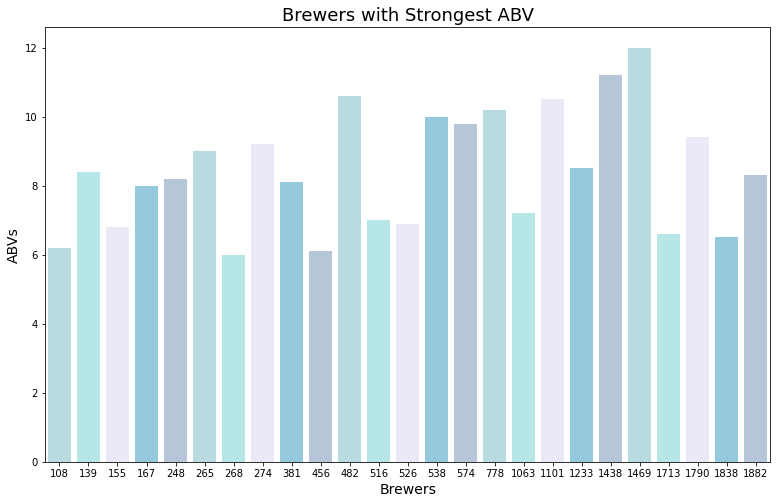

In [58]:
# Plot the results
plt.figure(figsize = (13,8))
sea.barplot(x = 'Brewers', y = 'ABV', data= df_brewer_strong_abv, palette=pastel)
plt.title('Brewers with Strongest ABV', fontsize=18)
plt.xlabel('Brewers', fontsize=14)
plt.ylabel('ABVs', fontsize=14)

The brewer id 1469 produces the beer with strongest abv around 12, followed by brewer 1438 and 482.

### <b> Mean Reviews by Beer

In [59]:
# A full visualization of ratings  
df_reviers_beer = pd.DataFrame()
df_reviers_beer['Palate'] = data['review_palate']
df_reviers_beer['Aroma'] = data['review_aroma']
df_reviers_beer['Appearance'] = data['review_appearance']
df_reviers_beer['Taste'] = data['review_taste']
df_reviers_beer['Beer'] = data['beer_id']

In [60]:
# Calculating the mean of each reviews
palate = df_reviers_beer.groupby(['Beer'])['Palate'].mean()
aroma = df_reviers_beer.groupby(['Beer'])['Aroma'].mean()
appearance = df_reviers_beer.groupby(['Beer'])['Appearance'].mean()
taste = df_reviers_beer.groupby(['Beer'])['Taste'].mean()

In [61]:
# Organizing the data in a dataframe
df_reviers_beer = pd.DataFrame()
df_reviers_beer['Beer'] = palate.index
df_reviers_beer['Palate'] = palate.values
df_reviers_beer['Aroma'] = aroma.values
df_reviers_beer['Appearance'] = appearance.values
df_reviers_beer['Taste'] = taste.values
df_reviers_beer.head()

,Beer,Palate,Aroma,Appearance,Taste
0,429,3.685518,3.480444,3.708245,3.659619
1,436,2.640580,2.379710,2.678261,2.391304
2,727,3.909023,4.201504,4.036090,4.075188
3,960,3.782468,3.701299,3.792208,4.000000
4,962,3.568493,3.506849,3.606164,4.000000


Text(0, 0.5, 'Mean Palate')

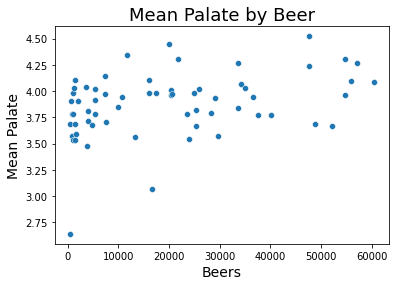

In [62]:
# Visualizing the results of palate
sea.scatterplot(x = 'Beer', y = 'Palate', data = df_reviers_beer)
plt.title('Mean Palate by Beer', fontsize=18)
plt.xlabel('Beers', fontsize=14)
plt.ylabel('Mean Palate', fontsize=14)

Text(0, 0.5, 'Mean Aroma')

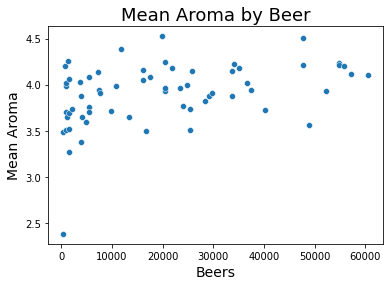

In [63]:
# Visualizing the results of aroma
sea.scatterplot(x = 'Beer', y = 'Aroma', data = df_reviers_beer)
plt.title('Mean Aroma by Beer', fontsize=18)
plt.xlabel('Beers', fontsize=14)
plt.ylabel('Mean Aroma', fontsize=14)

Text(0, 0.5, 'Mean Appearance')

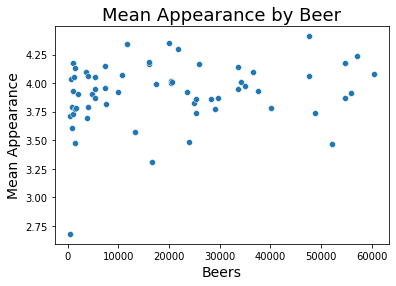

In [64]:
# Visualizing the results of appearance
sea.scatterplot(x = 'Beer', y = 'Appearance', data = df_reviers_beer)
plt.title('Mean Appearance by Beer', fontsize=18)
plt.xlabel('Beers', fontsize=14)
plt.ylabel('Mean Appearance', fontsize=14)

Text(0, 0.5, 'Mean Taste')

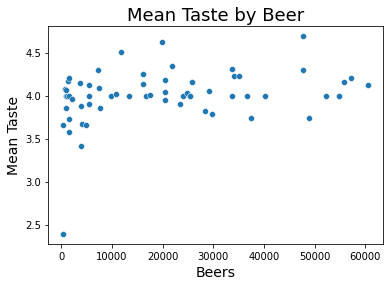

In [65]:
# Visualizing the results of taste
sea.scatterplot(x = 'Beer', y = 'Taste', data = df_reviers_beer)
plt.title('Mean Taste by Beer', fontsize=18)
plt.xlabel('Beers', fontsize=14)
plt.ylabel('Mean Taste', fontsize=14)

### <b> What kind of beer has the highest rating?

In [66]:
# Organizing in a dataframe
beer_style = text_columns['beer_style']
ratings = data['review_rating']
beer_high = pd.DataFrame()
beer_high['Beer Style'] = beer_style
beer_high['Ratings'] = ratings
beer_high.head()

,Beer Style,Ratings
0,Czech Pilsener,2.5
1,English Pale Ale,3.0
2,Pumpkin Ale,4.0
3,Scotch Ale / Wee Heavy,4.5
4,Russian Imperial Stout,4.0


In [67]:
# Find the styles with high rating
beer_high = beer_high.groupby(['Beer Style'])['Ratings'].max()

In [68]:
# Organizing the high rated styles in a dataframe
df_beer_high_scores = pd.DataFrame()
df_beer_high_scores['Beer Style Rating 5'] = beer_high.index
df_beer_high_scores.head()

,Beer Style Rating 5
0,American Barleywine
1,American Double / Imperial IPA
2,American Double / Imperial Stout
3,American IPA
4,American Pale Ale (APA)


The df_beer_high_scores stores the names of beers with rating 5 

# <b> Training the Model 

### <b> Data Correlation

In [69]:
# correlated data
corr_data = data.corr() 

Text(0, 0.5, 'Reviews')

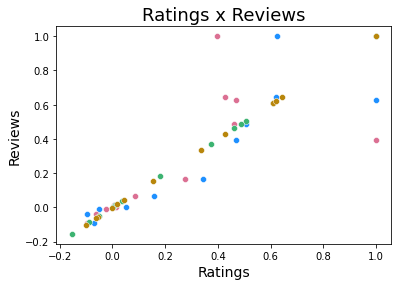

In [74]:
# Visualizing the correlation between the reviews with the rating 
sea.scatterplot(x = 'review_palate', y = 'review_rating', data = corr_data, color='DodgerBlue')
sea.scatterplot(x = 'review_appearance', y = 'review_rating', data = corr_data, color='PaleVioletRed')
sea.scatterplot(x = 'review_aroma', y = 'review_aroma', data = corr_data, color='MediumSeaGreen')
sea.scatterplot(x = 'review_taste', y = 'review_taste', data = corr_data, color = 'DarkGoldenrod')
plt.title('Ratings x Reviews', fontsize=18)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Reviews', fontsize=14)

<AxesSubplot:>

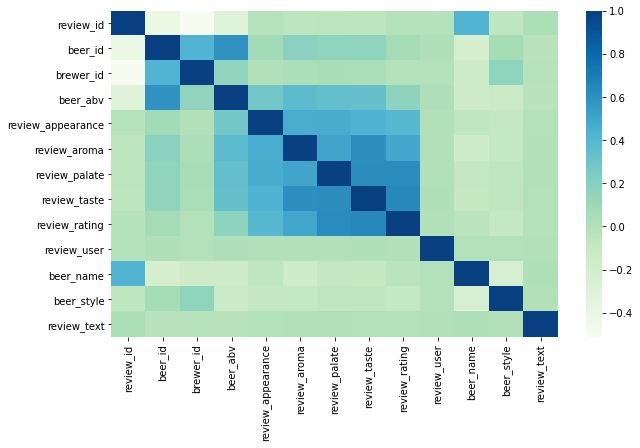

In [75]:
# Looking through a heat map the correlation between the features
plt.figure(figsize = (10,6))
sea.heatmap(corr_data,yticklabels=True,cbar=True,cmap='GnBu')

#### <b> Preparing the training data

In [76]:
correlated = ['review_appearance', 'review_aroma', 
          'review_palate', 'review_taste']

In [78]:
columns = data.columns
columns = [c for c in columns if c not in correlated]

In [84]:
# Features based on the correlation analysis
X = data[columns]
X = X.drop(columns=['review_rating', 'review_id', 'beer_id', 'brewer_id'])

In [85]:
X.head()

,beer_abv,review_user,beer_name,beer_style,review_text
0,4.4,5803,47,9,9719
1,4.4,535,9,12,6051
2,8.4,810,36,23,14139
3,8.5,1884,25,27,15093
4,10.5,267,28,25,8173


In [86]:
# Dependet variable
target = data['review_rating']

In [87]:
# Split Data in Train and Test with 33%
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.1, random_state = 1)

In [88]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22563, 5) (2508, 5) (22563,) (2508,)


#### <b> Linear Regression

In [89]:
# Linear Regression Model
lr = LinearRegression()
# Adjusting the Model
lr .fit(X_train, y_train)
# Making the Predictions
pred_lr = lr.predict(X_test)

print(lr .score(X_train,y_train), lr .score(X_test, y_test))

0.03329882044130139 0.032463764579885424


In [90]:
# Evaluating the errors
mae_lr = metrics.mean_absolute_error(y_test, pred_lr)
mse_lr = metrics.mean_squared_error(y_test, pred_lr)
rmse_lr =  np.sqrt(metrics.mean_squared_error(y_test, pred_lr))              
print('MAE:',mae_lr)
print('MSE:', mse_lr)
print('RMSE:', rmse_lr)

MAE: 0.4070045504190544
MSE: 0.34728148472574133
RMSE: 0.5893059347450536
